# Our Team

#### We are Team Kemet (The Ancient Egyptian Synonym of Egypt)
#### Daniel, Mark, Mohamed, Nour and Verina 
#### A small group of senior students from Mechatronics and automation Major
#### We decided to join this competition as we became passionate about both data and formula racing
#### We hope you enjoy reading our notebook

# Installing Required Libraries

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install shutil
!pip install pydot
!pip install graphviz

# Importing Required Libraries

- Pandas for using dataframes as variable containers
- Keras for neural network models
- Matplotlib and Seaborn for plotting
- SKLearn for preprocessing
- Numpy for data manipulation
- random for random data generation
- shutil for extracting data zip file

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

from tensorflow import keras
from keras import*
from keras.layers import*
# from keras_visualizer import visualizer
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
import seaborn as sn 

from sklearn.model_selection import train_test_split

import numpy as np

import random

import shutil

# Importing the Dataset

Reading the main csv file and specifing low_memory to be false (this reduces the variable types and sizes to save memory which can cause alot of noise) 

In [2]:
# Zip file location, uncomment if it is not extracted
#shutil.unpack_archive("weather.zip","")

#CSV File Location
file = "weather.csv/weather.csv"

# Loading dataset into pandas dataframe
df = pd.read_csv(file,low_memory=False)

# Printing the dataframe shape (rows x columns)
print("Data original Size : %d rows x %d columns"%(df.shape[0],df.shape[1])) 

Data original Size : 3572328 rows x 59 columns


# Generating PD Profile Report

A report in generated before any cleaning occurs to inspect the data before taking any decision

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)

# Saving report to html file
profile.to_file("Primary_Profile_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Inspecting Correlation Matrix

A table which displays the correlation coefficients for different variables with respect to the desired output.It helps summarizing the large dataset and to identify specific patterns.

In [4]:
corrMatrix = df.corr()
corrMatrix = corrMatrix.filter(items=['M_WEATHER', 'M_RAIN_PERCENTAGE'])
corrMatrix = corrMatrix.dropna()
corrMatrix

,M_WEATHER,M_RAIN_PERCENTAGE
M_GAME_MINOR_VERSION,-0.035001,-0.118432
M_SESSION_UID,-0.067724,-0.177354
M_SESSION_TIME,-0.007734,0.050886
M_FRAME_IDENTIFIER,-0.037441,-0.006011
M_PLAYER_CAR_INDEX,-0.265795,0.139027
M_BRAKING_ASSIST,0.128744,0.226468
M_SESSION_LINK_IDENTIFIER,0.094370,0.274133
M_PIT_RELEASE_ASSIST,0.202819,0.237467
TIMESTAMP,-0.118416,-0.164248
M_PIT_STOP_WINDOW_IDEAL_LAP,0.158741,-0.034702


# Data Cleaning

The cleaning process consists of 6 main steps:

1) Neglecting certain columns as they were irrlevant or causing failures
    For example, the M_ZONE_FLAG and M_ZONE_START had missing values alternating with the important features' missing
    values. Meaning that if we drop missing values on the entire dataset, results in an empty output
    
2) Removing duplicate records as they provide no benefit to the model

3) Filtering out values that have NUM_WEATHER_FORECAST_SAMPLES equals to 0, as stated by the competition tips as these records provide no value to the model

4) Taking only the most relevant values into our dataframe

5) Removing missing records (NAN values)

6) Removing (0, 45, 90, 120) time offsets as our model needs to predict (5,10,15,30,60) offsets so they provide no benefit

Note that, in this case, data normalization technique was eleminated as it caused some inaccuracy in results

In [5]:
# Dropping GAMEHOST as it's irrelevant
# Also, dropping Zone flag and zone start as they cause errors in cleansing
df = df.drop(columns=['GAMEHOST','Unnamed: 58','M_ZONE_FLAG','M_ZONE_START'])

# Dropping out duplicate values
df = df.drop_duplicates()

# Filtering out values that have NUM_WEATHER_FORECAST_SAMPLES equals to 0
df = df[df['M_NUM_WEATHER_FORECAST_SAMPLES'] != 0]

# Taking the most relevant values to out temperature prediction
values = df.filter(items=['M_SESSION_TYPE','M_TIME_OFFSET','M_TRACK_TEMPERATURE','M_TRACK_TEMPERATURE_CHANGE', 
                            'M_AIR_TEMPERATURE','M_AIR_TEMPERATURE_CHANGE','M_WEATHER', 'M_RAIN_PERCENTAGE'])
# Dropping empty values
values = values.dropna()

# Removing unwanted time offsets (0, 45, 90, 120)
values = values.drop(values[  (values['M_TIME_OFFSET'] == 0)
                            | (values['M_TIME_OFFSET'] == 45) 
                            | (values['M_TIME_OFFSET'] == 90) 
                            | (values['M_TIME_OFFSET'] == 120)].index)

# Normalizing values
#values=(values-values.min())/(values.max()-values.min())

print("Data new shape : %d rows x %d columns"%(values.shape[0],values.shape[1]))

Data new shape : 457887 rows x 8 columns


# Representing Data After Cleaning

In [6]:
values

,M_SESSION_TYPE,M_TIME_OFFSET,M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_WEATHER,M_RAIN_PERCENTAGE
17039,8,5.0,33,2.0,25,2.0,0,1.0
17040,8,10.0,33,2.0,25,2.0,0,2.0
17042,8,5.0,33,2.0,25,2.0,0,5.0
17043,8,10.0,33,2.0,25,2.0,0,5.0
17044,8,15.0,33,2.0,25,2.0,0,7.0
...,...,...,...,...,...,...,...,...
3572286,8,5.0,33,2.0,25,2.0,0,3.0
3572287,8,10.0,33,2.0,25,2.0,0,3.0
3572288,8,15.0,33,2.0,25,2.0,0,3.0
3572289,8,30.0,33,2.0,25,2.0,0,3.0


# Getting More Insights After Cleaning

The box plot helps us in viewing the (range, average, median, min, max, outliers) of each variable

<AxesSubplot:>

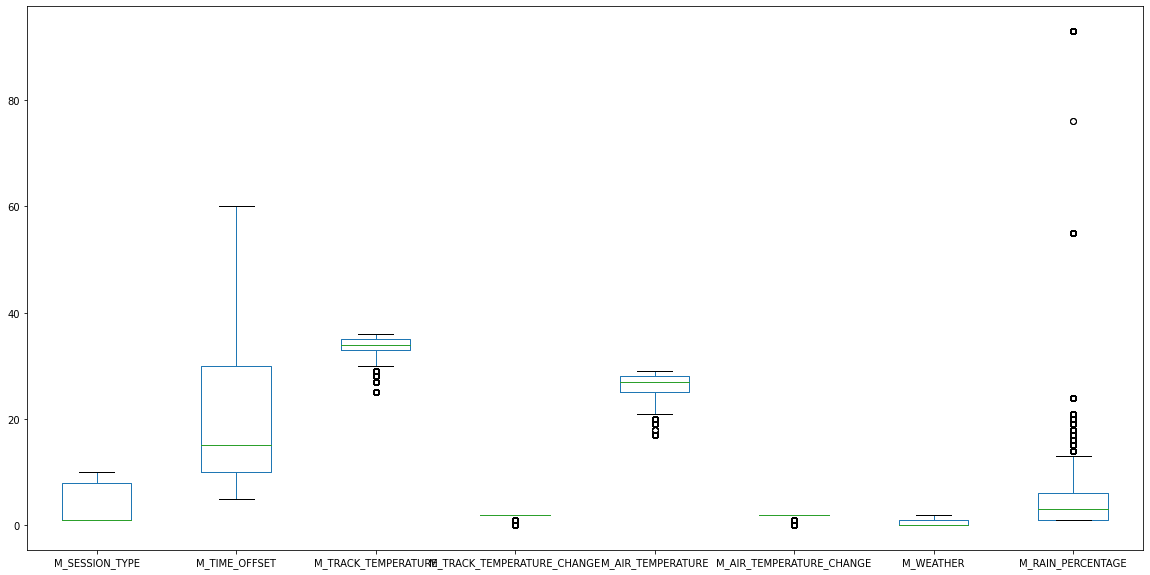

In [7]:
%matplotlib inline
values.plot.box(figsize=(20,10))

# Generating New Profile Report After Cleaning

The new report helps us to get more detailed insights from the clean data

In [8]:
profile = ProfileReport(values, title="Pandas Profiling Report", minimal=True)

# Saving report to html file
profile.to_file("Clean_Profile_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Viewing Correlation Matrix After Cleaning

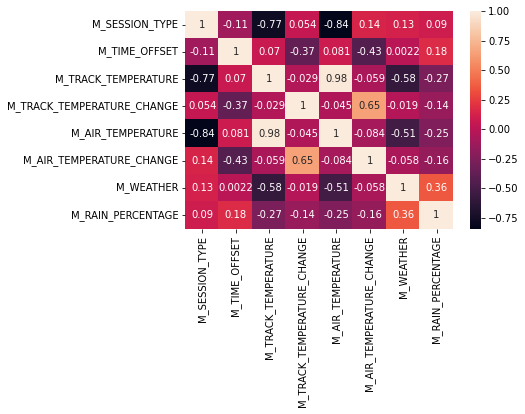

In [9]:
%matplotlib inline

# Generating correlation matrix
corrMatrix = values.corr()

# Converting Matrix Into Seaborn Heatmap
sn.heatmap(corrMatrix, annot = True)
plt.show()

# Splitting Data into Features and Labels

This splitting process is longer than usual as we have to ensure that both training and testing dataframes contain sufficient amount of records for (0,1,2) Weather types

The process is as follows,
1) We split our data into 3 dataframes, one for each weather type (as we have 3 different weather types)

2) We split each of those frames into 2 more frames, one for the features and one for the labels. So, we end up having 6 dataframes

In [10]:
# Splitting our values into 3 dataframes, one for each M_WEATHER type
values0, values1, values2 = [x for _, x in values.groupby(df['M_WEATHER'])]

# A list of our desired features
features = ['M_SESSION_TYPE','M_TIME_OFFSET','M_TRACK_TEMPERATURE',
                                'M_TRACK_TEMPERATURE_CHANGE','M_AIR_TEMPERATURE','M_AIR_TEMPERATURE_CHANGE']

# A list of the required outputs
labels = ['M_WEATHER','M_RAIN_PERCENTAGE']

# Splitting each values frame into features and labels
X_values0 = values0.filter(items= features)

y_values0 = values0.filter(items= labels)



X_values1 = values1.filter(items= features)

y_values1 = values1.filter(items= labels)



X_values2 = values2.filter(items= features)

y_values2 = values2.filter(items= labels)

# Splitting Data into Training and Testing 

Builing up on the previous step, now we have to generate the training and testing data which can be achieved by,
1) Generating training and testing, features and labels for each dataframe of the previous step which results in 12 dataframe

2) We recombine those 12 dataframe into suitable frames that we desire, resulting in our main 4 dataframes (X_train, X_test, y_train, y_test)

Last step demonstrates how many value we end up with from each weather type value in both training and testing labels

In [11]:
# Generating train and test dataframes for each value dataframe
random_state=3
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_values0, y_values0, test_size= 0.25, random_state=random_state)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_values1, y_values1, test_size= 0.15, random_state=random_state)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_values2, y_values2, test_size= 0.1, random_state=random_state)

# Combining all train and test, features and labels into proper dataframes 
X_train = pd.concat([X_train0, X_train1, X_train2 ])
X_test = pd.concat([X_test0, X_test1, X_test2 ])

y_train = pd.concat([y_train0, y_train1, y_train2 ])
y_test = pd.concat([y_test0, y_test1, y_test2 ])

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

# Ensuring the train and test labels have all 3 M_WEATHER types
print("\nTraining Variable\n value  count \n",y_train['M_WEATHER'].value_counts())
print("\nTesting Variable\n value  count\n",y_test['M_WEATHER'].value_counts())

X_train shape :  (357013, 6)
y_train shape :  (357013, 2)
X_test shape :  (100874, 6)
y_test shape :  (100874, 2)

Training Variable
 value  count 
 0    244710
1    104430
2      7873
Name: M_WEATHER, dtype: int64

Testing Variable
 value  count
 0    81570
1    18429
2      875
Name: M_WEATHER, dtype: int64


# Creating The Model

The main challenge was to create a model that predicts 2 values of different type (continious and discrete). In most scenarios, 2 different models were created to achieve this (one for classification and one for regression) but due to the fact that neural networks are very flexible when it comes to large datasets, we were able to perform both predictions in one model.

The model consists of 2 branches, one branch for classification and the other for regression. This helps us in modifying and adjusting each layer in each branch according to the available data without affecting the other variable, making them completely independant.

Each branch consists of a number of dense layers after the input layer. The classification branch ends in 6 nodes with a softmax layer to classify the weather type according to the weather types (0,1,2,3,4,5). The regression branch ends in one node with a relu layer to provide a positive percentage value.

The scoring metric used was Sparse Categorical Crossentropy in the classification case and Mean Absolute Error in the regression case.

The optimizer used was Adam with learning rate of 0.004.

A model visualization can be viewed in a following section.

In [12]:
# Defining input layer
inputs = keras.Input(shape=(6,), name ="Input")

# Defining Weather branch
dense = layers.Dense(10, activation="relu", name ="Weather_Dense_1")
x = dense(inputs)
x = layers.Dense(8, activation="relu", name ="Weather_Dense_2")(x)
Weather_branch = layers.Dense(6, activation="softmax", name ="Weather_Output")(x)

# Defining Rain branch
dense = layers.Dense(12, activation="relu", name ="Rain_Dense_1")
y = dense(inputs)
y = layers.Dense(18, activation="relu", name ="Rain_Dense_2")(y)
#y = layers.Dense(4, activation="relu", name ="Rain_Dense_3")(y)
#y = layers.Dense(4, activation="relu", name ="Rain_Dense_4")(y)
Rain_branch = layers.Dense(1, activation="linear", name ="Rain_Output")(y)

# Defining the model
model = keras.Model(inputs=inputs, outputs=[Weather_branch, Rain_branch], name="Functional_Model")

# Generating a summary
model.summary()

# Defining the loss function types
losses = {
    "Weather_Output": "sparse_categorical_crossentropy",
    "Rain_Output": "mean_absolute_error"
}

# Compiling the model
model.compile(loss=losses,
              optimizer=keras.optimizers.Adam(learning_rate=0.002),
              metrics=['accuracy'],
             )

Model: "Functional_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 6)]          0                                            
__________________________________________________________________________________________________
Weather_Dense_1 (Dense)         (None, 10)           70          Input[0][0]                      
__________________________________________________________________________________________________
Rain_Dense_1 (Dense)            (None, 12)           84          Input[0][0]                      
__________________________________________________________________________________________________
Weather_Dense_2 (Dense)         (None, 8)            88          Weather_Dense_1[0][0]            
___________________________________________________________________________________

# Visualizing The Neural Network

A simple block diagram representing the branched network where the question marks indicate that we dont know the number of rows available in the dataset which helps making the network more generic

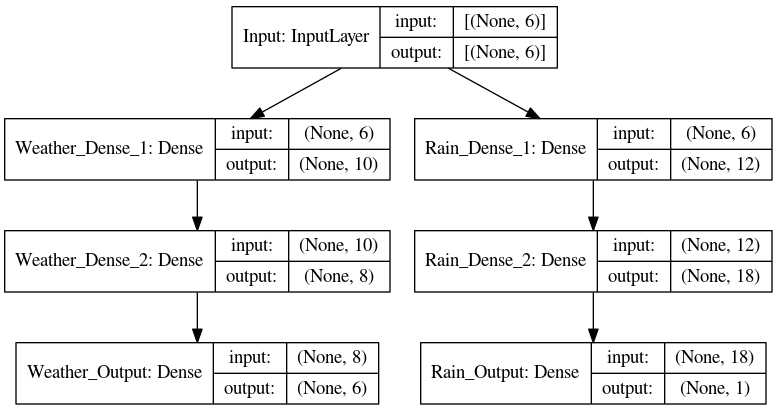

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True)

# Training Model

The training part is the main process where we feed our dataset into the model to make it learn and predict in the future

In [14]:
model_history = model.fit(
    x=X_train, # Features
    y={"Weather_Output": y_train["M_WEATHER"], "Rain_Output": y_train["M_RAIN_PERCENTAGE"]}, # Labels
    epochs=20, # Number of epochs
    verbose=1 # Training Visualization (0 = silent, 1 = progress bar, 2 = one line per epoch)
)

Epoch 1/20
11157/11157 [==============================] - 24s 2ms/step - loss: 3.3430 - Weather_Output_loss: 0.5704 - Rain_Output_loss: 2.7726 - Weather_Output_accuracy: 0.7470 - Rain_Output_accuracy: 0.3055
Epoch 2/20
11157/11157 [==============================] - 23s 2ms/step - loss: 2.9529 - Weather_Output_loss: 0.4075 - Rain_Output_loss: 2.5454 - Weather_Output_accuracy: 0.8397 - Rain_Output_accuracy: 0.3044
Epoch 3/20
11157/11157 [==============================] - 23s 2ms/step - loss: 2.7270 - Weather_Output_loss: 0.3261 - Rain_Output_loss: 2.4009 - Weather_Output_accuracy: 0.9098 - Rain_Output_accuracy: 0.3026
Epoch 4/20
11157/11157 [==============================] - 23s 2ms/step - loss: 2.4372 - Weather_Output_loss: 0.2608 - Rain_Output_loss: 2.1764 - Weather_Output_accuracy: 0.9428 - Rain_Output_accuracy: 0.3033
Epoch 5/20
11157/11157 [==============================] - 24s 2ms/step - loss: 2.3581 - Weather_Output_loss: 0.2225 - Rain_Output_loss: 2.1356 - Weather_Output_accuracy

# Saving Model

Saving the model so it can be used in the future without going through training again

In [15]:
model.save("Branched_Model.hdf5")

# Training Results

Visualizing the training results for better interpretion of the results

Note that, we care most about the Weather type prediction accuracy which tells us the confidence level of our weather type prediction, and the rain percentage loss which tells us the result deviation probability from the real value

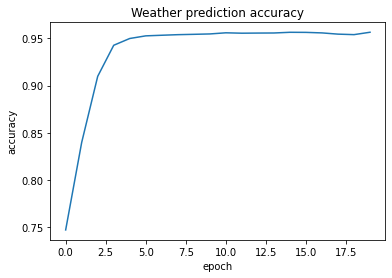

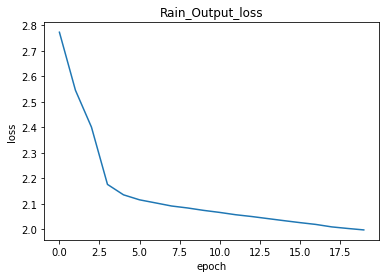

In [16]:
# Plotting model accuracy scaling from 0(0%) to 1(100%)
plt.plot(model_history.history['Weather_Output_accuracy'])
plt.title('Weather prediction accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plotting model loss
plt.plot(model_history.history['Rain_Output_loss'])
plt.title('Rain_Output_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Testing Model

Using our trained model to predict the testing data and printing our the weather type prediction accuracy and the rain percentage error margin

In [17]:
test_loss, test_weather_loss, test_rain_loss, test_weather_accuracy, test_rain_accuracy =  model.evaluate(
    X_test, # Testing features
    {"Weather_Output": y_test["M_WEATHER"], "Rain_Output": y_test["M_RAIN_PERCENTAGE"]} # Testing labels
)

print("Weather Type Test Accuracy :  " + str(round(test_weather_accuracy*100,2)) + " %")
print("Rain Percentage Test Loss : ", round(test_rain_loss,2))

3153/3153 [==============================] - 5s 2ms/step - loss: 1.9383 - Weather_Output_loss: 0.1515 - Rain_Output_loss: 1.7867 - Weather_Output_accuracy: 0.9728 - Rain_Output_accuracy: 0.3224
Weather Type Test Accuracy :  97.28 %
Rain Percentage Test Loss :  1.79


# Visualizing Results

Visualizing the model test results in proper plots

<AxesSubplot:title={'center':'Model Average Uncertainity For Predicting Rain Percentage'}>

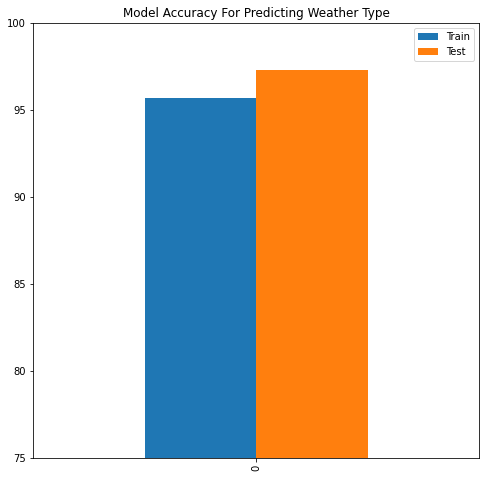

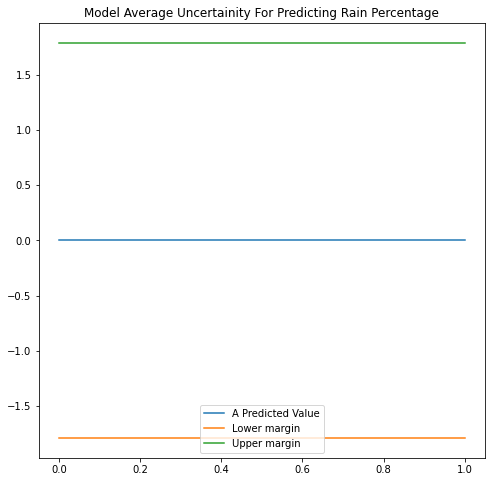

In [18]:
# Plotting Weather Type Prediction Accuracy results
accuracy = pd.DataFrame([['',
                    model_history.history["Weather_Output_accuracy"][-1]*100 ,
                    test_weather_accuracy*100]],
                  columns=['Neural Network Model', 'Train', 'Test'])


accuracy.plot(
        kind='bar',
        stacked=False,
        figsize=(8,8),
        ylim=(75,100),
        title='Model Accuracy For Predicting Weather Type')


# Plotting Rain Percentage Prediction Deviation results
deviation = pd.DataFrame({
   'A Predicted Value': [0],
   'Lower margin': [-round(test_rain_loss,2)],
    'Upper margin': [round(test_rain_loss,2)]
   }, index=[0,1])

deviation.plot(
        kind='line',
        figsize=(8,8),
        title='Model Average Uncertainity For Predicting Rain Percentage')


# Shaping The Output

After proper training and testing are done, its time to shape the resulted predictions into the desired dictionary-based style. Thats where the predict function comes in handy, it takes (a trained mode, the sample to test) as main arguments.

Additional arguments include:

- return_dict : 
    This can be set to 1 to return output as the desired dictionary or
    It can be set to 0 to return output as a pandas dataframe.


- return_preds_only : 
   This can be set to 1 to return output as model predictions only or
    It can be set to 0 to return output as a joined table of both input and predicted data.
    
    Note that return_preds_only can only have effect if return_dict is set to 0

In [19]:
def predict(model ,sample, return_dict=1,return_preds_only=0):
    # Initializing our variables
    short = 0
    long = 0
    time=[]
    dic={}
    big = sample.copy() # big is a big dataframe containing all data
    one = big.iloc[0] # one is the first row int the big frame
    big = big.append(one, ignore_index=True)
    
    # Adding the 5 time offset
    one['M_TIME_OFFSET'] = 5
    big = big.append(one, ignore_index=True)
    
    #Adding other offsets
    
    # Practice Race Type, Predicting to 60 mins 
    if ( sample.iloc[0]['M_SESSION_TYPE'] == 1):
        time = [10,15,30,60]
        long = 1
    elif ( sample.iloc[0]['M_SESSION_TYPE'] == 2):
        time = [10,15,30,60]
        long = 1
    elif ( sample.iloc[0]['M_SESSION_TYPE'] == 3):
        time = [10,15,30,60]
        long = 1   

    # Qualifying Race Type, Predicting to 15 mins     
    elif (sample.iloc[0]['M_SESSION_TYPE'] == 5 ):
        time = [10,15]
        short = 1
    elif (sample.iloc[0]['M_SESSION_TYPE'] == 6 ):
        time = [10,15]
        short = 1
    elif (sample.iloc[0]['M_SESSION_TYPE'] == 7 ):
        time = [10,15]
        short = 1
    
    # Any other session type is considered long session
    else:
        time = [10,15,30,60]
        long = 1
        
         
        
    for i in time:
        one['M_TIME_OFFSET'] = i
        big = big.append(one)
        
    
    big = big[big.M_TIME_OFFSET != 0]
    big = big.drop_duplicates(ignore_index=True)
        
    pred = model.predict(big)
    weather_type_arr = pred[0]
    weather_type=[]
    rain_percentage=[]
    for i in range(len(weather_type_arr)):
        weather_type.append(np.argmax(weather_type_arr[0][i]))
        rain_percentage.append((pred[1][i]))
    
    weather_type= pd.DataFrame(weather_type, columns= ['Weather Type'])
    rain_percentage= pd.DataFrame(rain_percentage, columns= ['Rain Percentage'])
    big = pd.concat([big,weather_type,rain_percentage],axis=1)
    if (return_dict == 0):
        if (return_preds_only == 0):
            return big
        elif (return_preds_only == 1):
            return pd.concat([big["M_TIME_OFFSET"],weather_type,rain_percentage],axis=1)
    
    elif (return_dict == 1):
        if (short):
            dic={'5':{}, '10':{}, '15':{} }
            for i in range(len(big['M_TIME_OFFSET'])):
                dic[str(int(big['M_TIME_OFFSET'][i]))]= {
                    'Type': big["Weather Type"][i], big["Weather Type"][i]: big["Rain Percentage"][i]}
        elif (long):
            dic= {'5':{}, '10':{}, '15':{}, '30':{}, '60':{} }
            for i in range(len(big['M_TIME_OFFSET'])):
                dic[str(int(big['M_TIME_OFFSET'][i]))]={
                    'Type': big["Weather Type"][i], big["Weather Type"][i]: big["Rain Percentage"][i]}
        return dic

# Loading a Pre-Trained Model

In [20]:
loaded_model = keras.models.load_model("Branched_Model.hdf5")
loaded_model.summary()

Model: "Functional_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 6)]          0                                            
__________________________________________________________________________________________________
Weather_Dense_1 (Dense)         (None, 10)           70          Input[0][0]                      
__________________________________________________________________________________________________
Rain_Dense_1 (Dense)            (None, 12)           84          Input[0][0]                      
__________________________________________________________________________________________________
Weather_Dense_2 (Dense)         (None, 8)            88          Weather_Dense_1[0][0]            
___________________________________________________________________________________

# Testing Loaded Model

Here we demonstrate how the model handles input data and what it outputs.

Note That the input data has to be in a specific format (Single pandas dataframe row) with specific column names as follows.

Then we test the 3 different output scenarios.

In [21]:
# Taking one of the test samples
test = X_test.iloc[0]
test = test.copy()
test["M_TIME_OFFSET"]=0
test = pd.DataFrame(test)
test = test.transpose()
test

,M_SESSION_TYPE,M_TIME_OFFSET,M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE
1895641,1.0,0.0,35.0,1.0,28.0,2.0


In [22]:
# Trying output as a dictionary
output = predict(loaded_model,test, return_dict= 1, return_preds_only= 0)
output

{'5': {'Type': 0, 0: 4.910150051116943},
 '10': {'Type': 0, 0: 3.8962786197662354},
 '15': {'Type': 0, 0: 2.9886600971221924},
 '30': {'Type': 0, 0: 0.9628760814666748},
 '60': {'Type': 0, 0: 9.164586067199707}}

In [23]:
# Trying output as a results only dataframe
output = predict(loaded_model,test, return_dict= 0, return_preds_only= 1)
output

,M_TIME_OFFSET,Weather Type,Rain Percentage
0,5.0,0,4.910150
1,10.0,0,3.896279
2,15.0,0,2.988660
3,30.0,0,0.962876
4,60.0,0,9.164586


In [24]:
# Trying output as a full dataframe
output = predict(loaded_model,test, return_dict= 0, return_preds_only= 0)
output

,M_SESSION_TYPE,M_TIME_OFFSET,M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,Weather Type,Rain Percentage
0,1.0,5.0,35.0,1.0,28.0,2.0,0,4.910150
1,1.0,10.0,35.0,1.0,28.0,2.0,0,3.896279
2,1.0,15.0,35.0,1.0,28.0,2.0,0,2.988660
3,1.0,30.0,35.0,1.0,28.0,2.0,0,0.962876
4,1.0,60.0,35.0,1.0,28.0,2.0,0,9.164586
